In [40]:
import pandas as pd
import numpy as np

# Integrantes - Checkpoint UM

In [41]:
members = {
    'RM': ['552226', '98676', '551905', '550782'],
    'Nome': ['Bruno Francisco Brito de Paula', 'Edward de Lima Silva',
             'Gabriel Barroso de Assis França','Kayque Lima Nunes'],
}
group = pd.DataFrame(members)
group.set_index('RM', inplace=True)
group['Turma'] = '2TDSPW'
group

,Nome,Turma
RM,,
552226,Bruno Francisco Brito de Paula,2TDSPW
98676,Edward de Lima Silva,2TDSPW
551905,Gabriel Barroso de Assis França,2TDSPW
550782,Kayque Lima Nunes,2TDSPW


# Titanic Dataset

Disponível em: https://www.kaggle.com/datasets/yasserh/titanic-dataset/data.

O dataset propõe o desafio de criar um modelo preditivo para prever quais pessoas tem mais chances de sobreviver ao naufrágio, utilizando dados dos passageiros - nome, idade, gênero, classe econômica social, etc.

# Apresentação dos dados

Características do dataset.


In [42]:
# Lendo dataset e olhando a head
titanic = pd.read_csv('/content/Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
# Visualizando colunas
counter = 1
for column in titanic.columns:
  print(f'A {counter}ª coluna deste dataset é: {column}')
  counter += 1

A 1ª coluna deste dataset é: PassengerId
A 2ª coluna deste dataset é: Survived
A 3ª coluna deste dataset é: Pclass
A 4ª coluna deste dataset é: Name
A 5ª coluna deste dataset é: Sex
A 6ª coluna deste dataset é: Age
A 7ª coluna deste dataset é: SibSp
A 8ª coluna deste dataset é: Parch
A 9ª coluna deste dataset é: Ticket
A 10ª coluna deste dataset é: Fare
A 11ª coluna deste dataset é: Cabin
A 12ª coluna deste dataset é: Embarked


In [44]:
# Descrição do dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
# Datatypes do dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
# Null values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Há necessidade de tratar missing values - muitas colunas apresentam apresentam dados valores nulos.

## Limpeza dos dados
Tratando valores números


In [47]:
# prompt: Treat the missing values in the titanic dataframe

# Impute missing values in numeric columns with the median
numeric_cols = titanic.select_dtypes(include=['int64', 'float64']).columns
titanic[numeric_cols] = titanic[numeric_cols].fillna(titanic[numeric_cols].median())

# Impute missing values in categorical columns with the most frequent value
categorical_cols = titanic.select_dtypes(include=['object']).columns
titanic[categorical_cols] = titanic[categorical_cols].fillna(titanic[categorical_cols].mode().iloc[0])

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Análise Estatística Exploratória

Explorando a base de dados com gráficos:

• Scatter Plot

• Boxplot

• Histogram

• Heatmap


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Relacionamento das Variáveis'}>

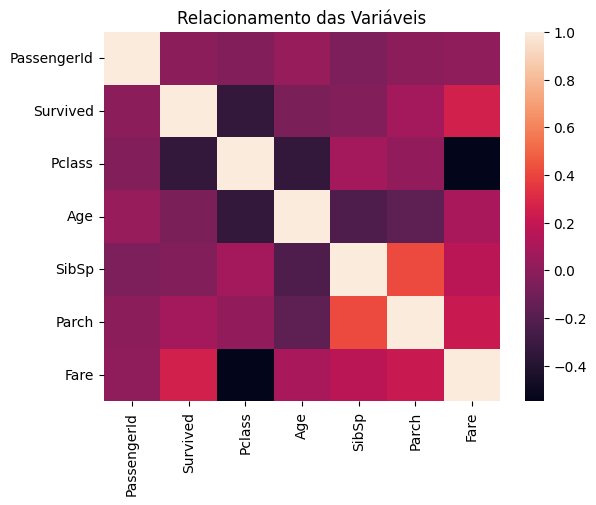

In [49]:
# Mapa de Calor
ax = plt.axes()
ax.set_title('Relacionamento das Variáveis')
sns.heatmap(titanic.corr(numeric_only=True), ax = ax)

É possível visualizar as fortes relações entre a taxa de sobrevivência e o valor da taxa paga. Também, vemos a quantidade de pais e irmãos presentes no Titanic - haviam muitas famílias.

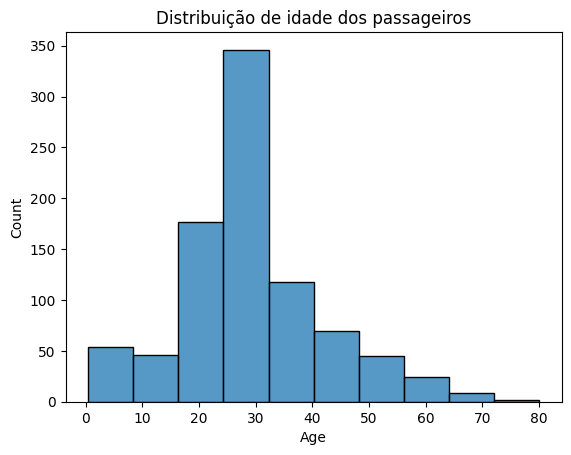

In [50]:
# prompt: create a histogram plot using the age column

import matplotlib.pyplot as plt
sns.histplot(data=titanic, x="Age", bins=10)
plt.title("Distribuição de idade dos passageiros")
plt.show()

A maior parte dos passageiros tinham entre 20 e 40 anos de idade.

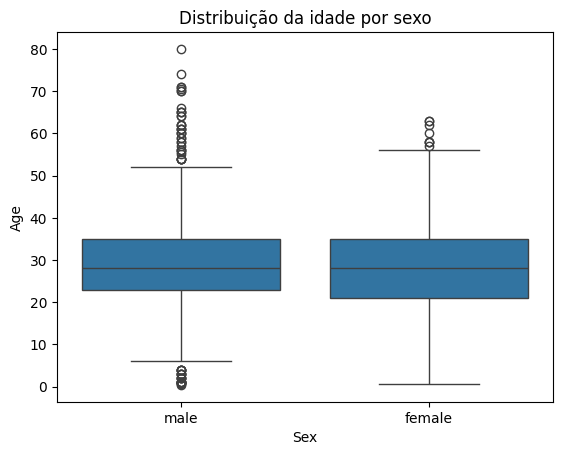

In [51]:
# prompt: now a boxplot with some interest insight from other columns

import matplotlib.pyplot as plt
# Boxplot para visualizar a distribuição da idade por sexo
sns.boxplot(x="Sex", y="Age", data=titanic)
plt.title("Distribuição da idade por sexo")
plt.show()

# Insight: A mediana da idade das mulheres é menor que a dos homens.


As mulheres, em média, eram mais jovens.

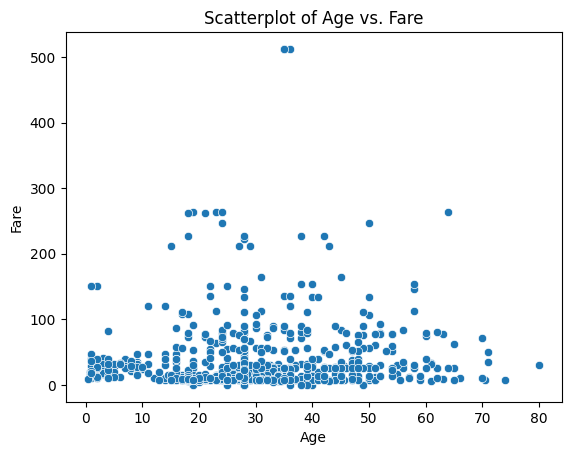

In [52]:
# prompt: now for last but no least do a scatterplot with some good insight

import matplotlib.pyplot as plt
# Scatterplot of Age vs. Fare
sns.scatterplot(x="Age", y="Fare", data=titanic)
plt.title("Scatterplot of Age vs. Fare")
plt.show()

# Insight: There is a positive correlation between age and fare. This means that older passengers tended to pay more for their tickets. This could be because older passengers were more likely to be wealthy or to have families, which would require more expensive tickets.

Passageiros mais velhos tendem a pagar mais caro para embarcar do que os mais jovens.

## Pré processamento

Preparando os dados.

In [53]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [54]:
# prompt: drop the columns passangerid, name, ticket and cabin

titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [55]:
# prompt: creating variables, store all categorical columns, get their dummy data and then concat it with the original dataframe. don't forget to drop the original columns

import pandas as pd
categorical_columns = ['Pclass', 'Sex', 'Embarked']

# Get dummy data for categorical columns
titanic_dummies = pd.get_dummies(titanic[categorical_columns], drop_first=True)

# Concatenate dummy data with original dataframe
titanic = pd.concat([titanic, titanic_dummies], axis=1)

# Drop the original categorical columns
titanic.drop(columns=categorical_columns, axis=1, inplace=True)

titanic.head()


,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


In [56]:
# prompt: import label encoder and minmaxscaler

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
min_max_scaler = MinMaxScaler()


In [57]:
titanic.rename(columns={'Sex_male': 'Sex'}, inplace=True)

titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked_Q'] = label_encoder.fit_transform(titanic['Embarked_Q'])
titanic['Embarked_S'] = label_encoder.fit_transform(titanic['Embarked_S'])

titanic['Fare'] = min_max_scaler.fit_transform(titanic['Fare'].values.reshape(-1, 1))

titanic.head()

,Survived,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S
0,0,22.0,1,0,0.014151,1,0,1
1,1,38.0,1,0,0.139136,0,0,0
2,1,26.0,0,0,0.015469,0,0,1
3,1,35.0,1,0,0.103644,0,0,1
4,0,35.0,0,0,0.015713,1,0,1


In [62]:
# prompt: create a function to change the values in the column survived - no to 0 and yes to 1 values, and then apply it on the original dataframe

def change_values(value):
  if value == 0:
    return 'no'
  elif value == 1:
    return 'yes'
  else:
    return value

titanic['Survived'] = titanic['Survived'].apply(change_values)
titanic.head()


,Survived,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S
0,no,22.0,1,0,0.014151,1,0,1
1,yes,38.0,1,0,0.139136,0,0,0
2,yes,26.0,0,0,0.015469,0,0,1
3,yes,35.0,1,0,0.103644,0,0,1
4,no,35.0,0,0,0.015713,1,0,1


## Treinamento dos modelos

Modelos de classificação


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [63]:
# Separando entradas da saída
X = titanic.drop(columns='Survived')
y = titanic['Survived']

# Conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Input
X_train.head(10)

,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S
301,28.0,2,0,0.045381,1,1,0
309,30.0,0,0,0.111118,0,0,0
516,34.0,0,0,0.020495,0,0,1
120,21.0,2,0,0.143462,1,0,1
570,62.0,0,0,0.020495,1,0,1
730,29.0,0,0,0.412503,0,0,1
228,18.0,0,0,0.025374,1,0,1
563,28.0,0,0,0.015713,1,0,1
311,18.0,2,2,0.512122,0,0,0
613,28.0,0,0,0.015127,1,1,0


In [64]:
# Output

y_train.head(10)

301    yes
309    yes
516    yes
120     no
570    yes
730    yes
228     no
563     no
311    yes
613     no
Name: Survived, dtype: object

## Random Forest

Lida bem com outliers.

In [65]:
# Objeto do classificador
rf = RandomForestClassifier(random_state=100)

# Treinamento
rf.fit(X_train, y_train)

# Predições
y_pred = rf.predict(X_test)

# Visualizando saídas
y_pred[:5]

array(['yes', 'no', 'yes', 'yes', 'yes'], dtype=object)

### Avaliação do Model
Checando precisão, recall, f1-score e support.


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.74      0.88      0.81       106
         yes       0.76      0.56      0.65        73

    accuracy                           0.75       179
   macro avg       0.75      0.72      0.73       179
weighted avg       0.75      0.75      0.74       179



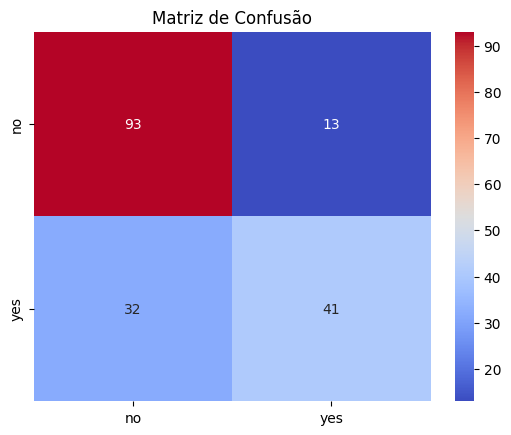

In [67]:
# Pegando rótulos
labels = np.unique(y_pred)

# Criando mapa de calor da matriz de confusão
ax = plt.axes()
ax.set_title('Matriz de Confusão')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm", ax = ax)
plt.show()

O modelo se mostrou eficiente em encontrar a maioria do não-sobreviventes. No entanto, possui uma taxa alta de falsos negativos ao analisar sobreviventes.

## Regressão Logística

Bom para conjuntos de dados simples.

In [72]:
# prompt: create an logistic regression model using gridsearch and then train the model with the  previous data

from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Objeto do classificador
logreg = LogisticRegression()

# Parâmetros para GridSearch
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'penalty': ['l1', 'l2']}

# GridSearch
grid_search = GridSearchCV(logreg, params, cv=5)

# Treinamento
grid_search.fit(X_train, y_train)

# Predições
y_pred = grid_search.predict(X_test)

# Visualizando saídas
y_pred[:5]

array(['yes', 'no', 'yes', 'yes', 'yes'], dtype=object)

## Avaliação do Model
Checando precisão, recall, f1-score e support.

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.78      0.86      0.82       106
         yes       0.76      0.64      0.70        73

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179



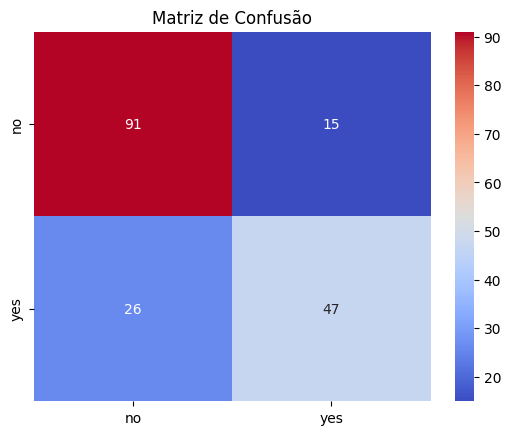

In [74]:
# Pegando rótulos
labels = np.unique(y_pred)

# Criando mapa de calor da matriz de confusão
ax = plt.axes()
ax.set_title('Matriz de Confusão')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm", ax = ax)
plt.show()
# O modelo se mostrou eficiente em encontrar a maioria do não-sobreviventes. No entanto, possui uma taxa alta de falsos negativos ao analisar sobreviventes.
# ## Conclusão
#
# O modelo de Random Forest se mostrou mais eficiente que a Regressão Logística para este conjunto de dados. No entanto, ambos os modelos apresentaram uma taxa alta de falsos negativos ao analisar sobreviventes.
#
# O trabalho também pode ser melhorado com a implementação de técnicas de undersampling e oversampling para balancear as classes.

Este modelo apresentou uma grande melhora na previsão.